In [1]:
import io
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Inicialização

## Criação da conexão

In [2]:
conn = sqlite3.connect('tp1.db')
cursor = conn.cursor()

## Carga dos dados

In [3]:
# ! sqlite3 tp1.db < despesas_publicas_tp1.sql

## Teste dos dados

In [4]:
df = pd.read_sql_query("SELECT * FROM ORGAO ORDER BY QTD_ORGAOS_SUBORDINADOS DESC", conn)
df

COD_ORGAO                                     NOME_ORGAO  \
0       26000                         Ministério da Educação   
1       30000      Ministério da Justiça e Segurança Pública   
2       22000  Ministério da Agricultura, Pecuária e Abastec   
3       24000  Ministério da Ciência, Tecnologia, Inovações    
4       52000                           Ministério da Defesa   
5       53000              Ministério da Integração Nacional   
6       25000                          Ministério da Fazenda   
7       36000                            Ministério da Saúde   
8       20000                       Presidência da República   
9       39000  Ministério dos Transportes, Portos e Aviação    
10      44000                    Ministério do Meio Ambiente   
11      55000           Ministério do Desenvolvimento Social   
12      35000             Ministério das Relações Exteriores   
13      81000                Ministério dos Direitos Humanos   

    QTD_ORGAOS_SUBORDINADOS  
0                       104  
1                         6  
2                         5  
3                         4  
4                         4  
5                         4  
6                         3  
7                         3  
8                         2  
9                         2  
10                        2  
11                        2  
12                        1  
13                        1

# Consultas

## 4.1 Comandos SQL

Como minha matricula é 2018**054800**, farei as seguintes questões:

1, 6, 5, 9, 2(já fiz a 1), 3(já fiz 1 e 2). Sendo assim, resolverei as questões na seguinte ordem:

* 1, 6, 5, 9, 2, 3

### Questão 1
Liste todos os códigos e nomes de subfunções da função que possui o maior número de subfunções

In [5]:
df = pd.read_sql_query("SELECT DISTINCT SF.* " + 
                       "FROM DETALHAMENTO_FUNCAO as DF " +
                       "NATURAL JOIN SUBFUNCAO as SF " +
                       "NATURAL JOIN (SELECT COD_FUNCAO, COUNT(COD_SUBFUNCAO) AS QTD " +
                                      "FROM DETALHAMENTO_FUNCAO " + 
                                      "GROUP BY COD_FUNCAO " +
                                      "ORDER BY QTD DESC LIMIT 1)", conn)
df

COD_SUBFUNCAO               NOME_SUBFUNCAO
0            125  Normatização e fiscalização
1            126     Tecnologia da informação
2            131           Comunicação social
3            244      Assistência comunitária
4            306       Alimentação e nutrição
5            365            Educação infantil
6            511      Saneamento básico rural

### Questão 6
Liste todos os nomes de funções e subfunções das despesas públicas do terceiro trimestre de 2018 e seus respectivos valores totais, apenas para o programa MAIS MEDICOS

NOME_FUNCAO                         NOME_SUBFUNCAO  \
0  Defesa nacional                    Administração geral   
1         Educação  Assistência hospitalar e ambulatorial   
2         Educação                        Ensino superior   
3            Saúde                         Atenção básica   

   SUM(DP.VALOR_DESPESA)  
0                      0  
1                      0  
2                   2400  
3                  11000

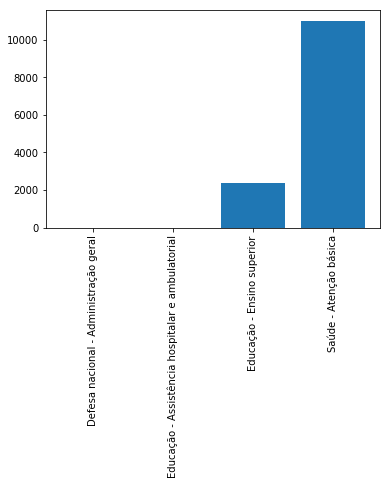

In [58]:
df = pd.read_sql_query("SELECT F.NOME_FUNCAO, SF.NOME_SUBFUNCAO, SUM(DP.VALOR_DESPESA) " +
                       "FROM DETALHAMENTO_FUNCAO as DF " +
                       "NATURAL JOIN FUNCAO as F " + 
                       "NATURAL JOIN SUBFUNCAO as SF " +
                       "NATURAL JOIN DESPESA_PUBLICA as DP " +
                       "WHERE ANO_DESPESA=2018 AND " +
                            "MES_DESPESA > 6 AND " +
                            "MES_DESPESA < 10 AND " +
                            "COD_PROGRAMA_GOVERNO = " +
                               "(SELECT COD_PROGRAMA_GOVERNO " + 
                                 "FROM PROGRAMA_GOVERNO " + 
                                 "WHERE NOME_PROGRAMA_GOVERNO = 'MAIS MEDICOS') " +
                       "GROUP BY F.NOME_FUNCAO, SF.NOME_SUBFUNCAO", conn)

plt.bar((df.iloc[:,0] + " - " + df.iloc[:,1]), df.iloc[:,2])
plt.xticks(rotation=90)
df

### Questão 5

Liste o código e nome dos programas de governo que possuíram os 3 maiores valores de despesas totais na função de educação durante o ano de 2018.

In [7]:
df = pd.read_sql_query("SELECT PG.* FROM " +  
                           "(SELECT * FROM" + 
                               "(SELECT * FROM DESPESA_PUBLICA " +
                               "NATURAL JOIN DETALHAMENTO_FUNCAO " +
                               "NATURAL JOIN FUNCAO " +
                               "WHERE NOME_FUNCAO='Educação')" + 
                           "WHERE ANO_DESPESA=2018 " + 
                           "GROUP BY COD_PROGRAMA_GOVERNO " + 
                           "ORDER BY SUM(VALOR_DESPESA) DESC LIMIT 3) as DP " + 
                       "NATURAL JOIN PROGRAMA_GOVERNO as PG", conn)
df

COD_PROGRAMA_GOVERNO NOME_PROGRAMA_GOVERNO
0                    11                  ENEM
1                    14              PRONATEC
2                    35          MAIS MEDICOS

### Questão 9

Liste todas as despesas públicas (código da despesa, mês e ano da despesa, modalidade, valor) em que o órgão responsável é aquele que possui o maior número de órgãos subordinados.

COD_DESPESA  MES_DESPESA  ANO_DESPESA  \
0            196           10         2018   
1            197            1         2018   
2            198            2         2018   
3            199            3         2018   
4            200            4         2018   
5            201            5         2018   
6            202            6         2018   
7            203            7         2018   
8            204            9         2018   
9            205           10         2018   
10           206           11         2018   
11           207           12         2018   
12           208            1         2018   
13           209            6         2018   
14           210            7         2018   
15           211            8         2018   
16           212            9         2018   
17           213           11         2018   
18           214           12         2018   
19           215            1         2018   
20           216            2         2018   
21           217            3         2018   
22           218            4         2018   
23           219            5         2018   
24           220            6         2018   
25           221            7         2018   
26           222            8         2018   
27           223            9         2018   
28           224           10         2018   
29           225           11         2018   
..           ...          ...          ...   
264          460            3         2018   
265          461            4         2018   
266          462            5         2018   
267          463            6         2018   
268          464            7         2018   
269          465            8         2018   
270          466            9         2018   
271          467           10         2018   
272          468           11         2018   
273          469           12         2018   
274          470            1         2018   
275          471            2         2018   
276          472            3         2018   
277          473            4         2018   
278          474            5         2018   
279          475            6         2018   
280          476            8         2018   
281          477           12         2018   
282          478            1         2018   
283          479            2         2018   
284          480            3         2018   
285          481            4         2018   
286          482            5         2018   
287          483            6         2018   
288          484            7         2018   
289          485            8         2018   
290          486            9         2018   
291          487           10         2018   
292          488           11         2018   
293          489           12         2018   

                                MODALIDADE_DESPESA  VALOR_DESPESA  
0                          Reserva de Contingência            0.0  
1                          Reserva de Contingência            0.0  
2                          Reserva de Contingência            0.0  
3                          Reserva de Contingência            0.0  
4                          Reserva de Contingência            0.0  
5                          Reserva de Contingência            0.0  
6                          Reserva de Contingência            0.0  
7                          Reserva de Contingência            0.0  
8                          Reserva de Contingência            0.0  
9                          Reserva de Contingência            0.0  
10                         Reserva de Contingência            0.0  
11                         Reserva de Contingência            0.0  
12   APLICACOES DIRETAS - OPER.INTRA-ORCAMENTARIAS            0.0  
13   APLICACOES DIRETAS - OPER.INTRA-ORCAMENTARIAS            0.0  
14   APLICACOES DIRETAS - OPER.INTRA-ORCAMENTARIAS            0.0  
15   APLICACOES DIRETAS - OPER.INTRA-ORCAMENTARIAS            0.

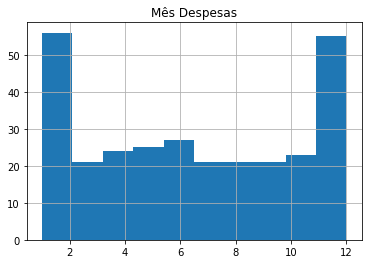

In [8]:
df = pd.read_sql_query("SELECT DP.COD_DESPESA, DP.MES_DESPESA, DP.ANO_DESPESA, DP.MODALIDADE_DESPESA, DP.VALOR_DESPESA " +
                       "FROM (SELECT * " +
                           "FROM ORGAO " +
                           "ORDER BY QTD_ORGAOS_SUBORDINADOS DESC " + 
                           "LIMIT 1) AS O " + 
                       "JOIN DESPESA_PUBLICA as DP ON O.COD_ORGAO=DP.COD_ORGAO", conn)
df['MES_DESPESA'].hist()
plt.title('Mês Despesas')
df

### Questão 2

Liste o valor total de despesas públicas por função (nome) e subfunção (nome), apenas nos casos em que esse valor total excedeu 200 mil reais.

In [9]:
df = pd.read_sql_query("SELECT VALOR_DESPESA, NOME_FUNCAO, NOME_SUBFUNCAO FROM " + 
                       "(SELECT * FROM " + 
                       "(SELECT * FROM " + 
                       "(SELECT * FROM DESPESA_PUBLICA as DP WHERE VALOR_DESPESA > 200000) as DP " + 
                       "NATURAL JOIN DETALHAMENTO_FUNCAO) as DF " + 
                       "NATURAL JOIN FUNCAO) as DF_F " + 
                       "NATURAL JOIN SUBFUNCAO AS SF", conn)
df

VALOR_DESPESA         NOME_FUNCAO           NOME_SUBFUNCAO
0      219668.07  Assistência social  Assistência comunitária
1      334126.70            Educação          Educação básica

## Questão 3

Liste todos os nomes dos órgãos e o valor das despesas totais no ano de 2018 para os mesmos, ordenando de forma decrescente pelo valor.

NOME_ORGAO  SUM(VALOR_DESPESA)
0                            Ministério da Defesa           353376.70
1            Ministério do Desenvolvimento Social           278586.35
2   Ministério da Agricultura, Pecuária e Abastec            90836.51
3                          Ministério da Educação            64007.82
4                             Ministério da Saúde            50971.19
5   Ministério da Ciência, Tecnologia, Inovações                 0.00
6                           Ministério da Fazenda                0.00
7               Ministério da Integração Nacional                0.00
8       Ministério da Justiça e Segurança Pública                0.00
9              Ministério das Relações Exteriores                0.00
10                    Ministério do Meio Ambiente                0.00
11                Ministério dos Direitos Humanos                0.00
12  Ministério dos Transportes, Portos e Aviação                 0.00
13                       Presidência da República                0.00

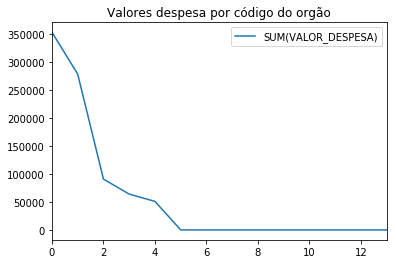

In [10]:
df = pd.read_sql_query("SELECT NOME_ORGAO, SUM(VALOR_DESPESA)" + 
                       "FROM ORGAO as O " +
                       "NATURAL JOIN DESPESA_PUBLICA as DP " +
                       "WHERE DP.ANO_DESPESA='2018' " +
                       "GROUP BY NOME_ORGAO " +
                       "ORDER BY SUM(VALOR_DESPESA) DESC", conn)
df.plot()
plt.title('Valores despesa por código do orgão')
df

## 4.2 Tradução de Comandos da Álgebra Relacional

Além das seis consultas anteriores, traduza as seguintes expressões da álgebra relacional para o SQL e execute-as também.

### Questão 12

π NOME_FUNCAO, NOME_SUBFUNCAO(FUNCAO ⋈ DETALHAMENTO FUNCAO ⋈ SUBFUNCAO)

In [11]:
df = pd.read_sql_query("SELECT DISTINCT NOME_FUNCAO, NOME_SUBFUNCAO " + 
                       "FROM FUNCAO as F " + 
                       "NATURAL JOIN DETALHAMENTO_FUNCAO as DF " +
                       "NATURAL JOIN SUBFUNCAO as SF", conn)
df

NOME_FUNCAO                                    NOME_SUBFUNCAO
0     Essencial à justiça                                Comunicação social
1         Defesa nacional                               Administração geral
2         Defesa nacional                                  Defesa terrestre
3       Segurança pública                               Administração geral
4       Segurança pública                                      Policiamento
5       Segurança pública                                      Defesa civil
6       Segurança pública                         Informação e inteligência
7      Assistência social                       Normatização e fiscalização
8      Assistência social                          Tecnologia da informação
9      Assistência social                                Comunicação social
10     Assistência social                           Assistência comunitária
11     Assistência social                            Alimentação e nutrição
12     Assistência social                                 Educação infantil
13     Assistência social                           Saneamento básico rural
14                  Saúde                      Formação de recursos humanos
15                  Saúde                                    Atenção básica
16                  Saúde             Assistência hospitalar e ambulatorial
17               Trabalho                               Fomento ao trabalho
18               Educação             Assistência hospitalar e ambulatorial
19               Educação                               Ensino profissional
20               Educação                                   Ensino superior
21               Educação                                   Educação básica
22               Educação             Transferências para a educação básica
23  Direitos da cidadania            Assistência ao portador de deficiência
24  Direitos da cidadania                    Custódia e reintegração social
25  Direitos da cidadania         Direitos individuais, coletivos e difusos
26              Urbanismo                           Assistência comunitária
27       Gestão ambiental               Preservação e conservação ambiental
28       Gestão ambiental                                 Recursos hídricos
29   Ciência e Tecnologia                        Desenvolvimento científico
30   Ciência e Tecnologia          Desenvolvimento tecnológico e engenharia
31            Agricultura  Difusão do conhecimento científico e tecnológico
32            Agricultura                 Promoção da produção agropecuária
33    Organização agrária                       Normatização e fiscalização
34    Organização agrária                           Ordenamento territorial
35    Organização agrária                                    Extensão rural
36    Organização agrária                                   Reforma agrária
37              Indústria                                Promoção comercial
38             Transporte                               Administração geral
39     Encargos especiais                         Outros encargos especiais

### Questão 13

π MODALIDADE_DESPESA, VALOR_DESPESA, NOME_PROGRAMA_GOVERNO(PROGRAMA GOVERNO ⋈ σ MODALIDADE DESPESA=‘Reserva de Contingêcia’(DESPESA PUBLICA))

MODALIDADE_DESPESA  VALOR_DESPESA  \
0   Reserva de Contingência           0.00   
1   Reserva de Contingência           0.00   
2   Reserva de Contingência           0.00   
3   Reserva de Contingência        8215.70   
4   Reserva de Contingência           3.42   
5   Reserva de Contingência       81120.13   
6   Reserva de Contingência           0.00   
7   Reserva de Contingência        1497.26   
8   Reserva de Contingência           0.00   
9   Reserva de Contingência           0.00   
10  Reserva de Contingência           0.00   
11  Reserva de Contingência           0.00   
12  Reserva de Contingência           0.00   
13  Reserva de Contingência           0.00   
14  Reserva de Contingência           0.00   
15  Reserva de Contingência        1210.00   
16  Reserva de Contingência           0.00   
17  Reserva de Contingência           0.00   
18  Reserva de Contingência           0.00   
19  Reserva de Contingência         135.36   
20  Reserva de Contingência           0.00   
21  Reserva de Contingência        2000.00   
22  Reserva de Contingência           0.00   
23  Reserva de Contingência       18178.00   
24  Reserva de Contingência       28073.08   
25  Reserva de Contingência         385.38   
26  Reserva de Contingência        5900.00   
27  Reserva de Contingência           0.00   
28  Reserva de Contingência           0.00   
29  Reserva de Contingência           0.00   
30  Reserva de Contingência        2400.00   
31  Reserva de Contingência           0.00   
32  Reserva de Contingência           0.00   
33  Reserva de Contingência           0.00   
34  Reserva de Contingência           0.00   
35  Reserva de Contingência           0.00   
36  Reserva de Contingência       38971.19   
37  Reserva de Contingência       11000.00   
38  Reserva de Contingência        1000.00   
39  Reserva de Contingência      334126.70   
40  Reserva de Contingência       19250.00   
41  Reserva de Contingência       58918.28   

                                NOME_PROGRAMA_GOVERNO  
0                                  BRASIL SEM MISERIA  
1                               VIOLENCIA NO TRANSITO  
2                            TERRITORIOS DA CIDADANIA  
3                                  BRASIL SEM MISERIA  
4                                  BRASIL SEM MISERIA  
5                                  BRASIL SEM MISERIA  
6                             REGULARIZACAO FUNDIARIA  
7                             REGULARIZACAO FUNDIARIA  
8                                SEGURO RURAL PRIVADO  
9                                    VIVER SEM LIMITE  
10                             CIENCIA SEM FRONTEIRAS  
11                               GESTAO AEROPORTUARIA  
12                                 DESASTRES NATURAIS  
13                                SATELITE (TELEBRAS)  
14                                     MELHOR EM CASA  
15                                       REDE CEGONHA  
16                                       REDE CEGONHA  
17                                 CONTROLE DO CANCER  
18                                               ENEM  
19                                               ENEM  
20                                       PROVA BRASIL  
21                                           PRONATEC  
22                                           PRONATEC  
23                                           PRONATEC  
24                                           PRONATEC  
25                                           PRONATEC  
26                                           PRONATEC  
27                                   CADEIAS PUBLICAS  
28                           CRACK, E POSSIVEL VENCER  
29                                       MAIS MEDICOS  
30                                       MAIS MEDICOS  
31                             CRIMINALIDADE VIOLENTA  
32                                         OLIMPIADAS  
33                                             SINESP  
34                                            ENAFRON  
35  UPA (INVES

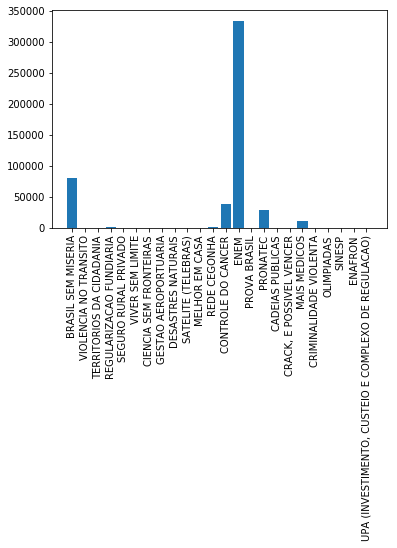

In [12]:
df = pd.read_sql_query("SELECT DISTINCT MODALIDADE_DESPESA, VALOR_DESPESA, NOME_PROGRAMA_GOVERNO " + 
                       "FROM PROGRAMA_GOVERNO as PG " + 
                       "NATURAL JOIN (SELECT * FROM DESPESA_PUBLICA " +
                                      "WHERE MODALIDADE_DESPESA='Reserva de Contingência')", conn)
plt.bar(df.iloc[:,2], df.iloc[:,1])
plt.xticks(rotation=90)
df

### Questão 14

π VALOR_DESPESA, NOME ORGAO(DESPESA PUBLICA ⋈ σ NOME ORGAO=‘Ministério da Fazenda’(ORGAO))

In [13]:
df = pd.read_sql_query("SELECT DISTINCT VALOR_DESPESA, NOME_ORGAO " + 
                       "FROM DESPESA_PUBLICA as DP " + 
                       "NATURAL JOIN ORGAO as O " +
                       "WHERE O.NOME_ORGAO='Ministério da Fazenda'", conn)
df

VALOR_DESPESA             NOME_ORGAO
0              0  Ministério da Fazenda

### Questão 15

π NOME_PROGRAMA_GOVERNO, VALOR_DESPESA(DESPESA_PUBLICA ⋈ σ NOME_ORGAO='Ministério da Saúde'(ORGAO) ⋈ PROGRAMA_GOVERNO)

NOME_PROGRAMA_GOVERNO  VALOR_DESPESA
0                                    VIVER SEM LIMITE           0.00
1                                      SOS EMERGENCIA           0.00
2                                      MELHOR EM CASA           0.00
3                                                 UBS           0.00
4   UPA (INVESTIMENTO, CUSTEIO E COMPLEXO DE REGUL...           0.00
5                                        REDE CEGONHA           0.00
6                                  CONTROLE DO CANCER           0.00
7                                  CONTROLE DO CANCER       38971.19
8                            CRACK, E POSSIVEL VENCER           0.00
9                                  BRASIL SEM MISERIA           0.00
10  PROGRAMA NACIONAL DE MELHORIA DE ACESSO E QUAL...           0.00
11                                       MAIS MEDICOS           0.00
12                                       MAIS MEDICOS       11000.00
13                                       MAIS MEDICOS        1000.00

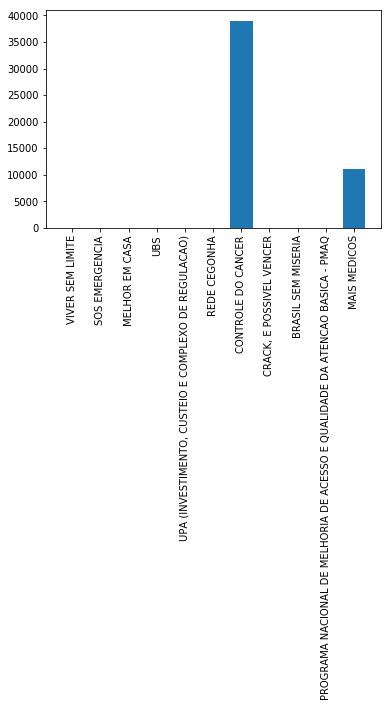

In [14]:
df = pd.read_sql_query("SELECT DISTINCT NOME_PROGRAMA_GOVERNO, VALOR_DESPESA " + 
                       "FROM DESPESA_PUBLICA as DP " + 
                       "NATURAL JOIN ORGAO as O " +
                       "NATURAL JOIN PROGRAMA_GOVERNO " +
                       "WHERE O.NOME_ORGAO='Ministério da Saúde'", conn)
plt.bar(df.iloc[:,0], df.iloc[:,1])
plt.xticks(rotation=90)
df